In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
import acquire
import prepare
import wrangle
from wordcloud import WordCloud
import nltk.sentiment
# pd.set_option('display.max_colwidth', None)
from time import strftime
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# extensions=acquire.get_extensions()

In [3]:
# len(extensions)

In [4]:
# extensions

In [5]:
# original=acquire.make_json(cached=False)
original = pd.read_json('repo_readmes_pj.json')
df=original.copy()
df.head()

,repo,language,readme_contents
0,using-system/LightningPay,C#,# LightningPay\nBitcoin Lightning Network Paym...
1,drminnaar/react-bitcoin-monitor,JavaScript,# React Bitcoin Monitor\n\nAn app that monitor...
2,lbryio/lbrycrd,C++,# LBRYcrd - The LBRY blockchain\n\n[![Build St...
3,ElementsProject/lightning-charge,JavaScript,# Lightning Charge\n\n[![build status](https:/...
4,kilimchoi/cryptocurrency,None,Check out https://coinbuddy.co/coins to track ...


In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(160, 3)

In [8]:
df.language.value_counts()

JavaScript          36
Python              32
C++                 15
PHP                 14
C                    8
HTML                 6
Go                   6
Java                 5
Ruby                 4
C#                   3
Shell                3
Jupyter Notebook     3
TypeScript           3
CSS                  1
SCSS                 1
R                    1
Prolog               1
Vue                  1
Dart                 1
CoffeeScript         1
VHDL                 1
Perl                 1
Rust                 1
Name: language, dtype: int64

In [9]:
df = prepare.prep_readme_data(df, 'readme_contents', extra_words=[], exclude_words=[])
df.sample(10)

,repo,language,readme_contents,clean,stemmed,lemmatized
65,keeshux/basic-blockchain-programming,C,"Sample code from ""Basic blockchain programming...",sample code basic blockchain programming devel...,sampl code basic blockchain program developero...,sample code basic blockchain programming devel...
138,Jumpsu/klondike,Prolog,klondike\n========\n\nBitcoin ASIC mining boar...,klondike bitcoin asic mining board project war...,klondik bitcoin asic mine board project warn t...,klondike bitcoin asic mining board project war...
49,jameslitton/coinscope,C++,# coinscope\nAn observation and testing framew...,coinscope observation testing framework bitcoi...,coinscop observ test framework bitcoin bitcoin...,coinscope observation testing framework bitcoi...
34,prettymuchbryce/hellobitcoin,Go,### Overview\n\nThis is a collection of simple...,overview collection simple programs generate b...,overview thi collect simpl program gener bitco...,overview collection simple program generate bi...
78,SF-Bitcoindevs/bitcoinjslib-wallet,CSS,## Project\nSF Bitcoindev build a determinist ...,project sf bitcoindev build determinist web wa...,project sf bitcoindev build determinist web wa...,project sf bitcoindev build determinist web wa...
109,bitcoin-computer/bitcoin-computer-bitcore,JavaScript,# Bitcoin Computer Bitcore\n\n## About Bitcoin...,bitcoin computer bitcore bitcoin computer bitc...,bitcoin comput bitcor bitcoin comput bitcor bi...,bitcoin computer bitcore bitcoin computer bitc...
125,ashchan/bitcoin-ethereum-cryptography,None,# 比特币、以太坊加密技术\n\n2017年5月21日在东京[亿咖啡](http://eca...,2017521httpecafetokyo slide markdown deckset p...,2017521httpecafetokyo slide markdown deckset p...,2017521httpecafetokyo slide markdown deckset p...
18,dily3825002/awesome-blockchain,None,"<p align=""center"">\n <img src=""./logo.jpeg""...",p aligncenter img srclogojpeg height130 p p al...,p aligncent img srclogojpeg height130 p p alig...,p aligncenter img srclogojpeg height130 p p al...
120,openblockchains/programming-bitcoin-script,Ruby,"\nFor more blockchain books, see the [**Best o...",blockchain books see best crypto books page ht...,blockchain book see best crypto book page http...,blockchain book see best crypto book page http...
48,pooler/rollproxy,Python,*********\nRollProxy\n*********\n\nRollProxy i...,rollproxy rollproxy mining proxy bitcoin crypt...,rollproxi rollproxi mine proxi bitcoin cryptoc...,rollproxy rollproxy mining proxy bitcoin crypt...


In [10]:
df.shape

(160, 6)

In [11]:
df.columns

Index(['repo', 'language', 'readme_contents', 'clean', 'stemmed',
       'lemmatized'],
      dtype='object')

In [12]:
df=df.drop(columns=['readme_contents', 'clean', 'stemmed'])
df.head()

,repo,language,lemmatized
0,using-system/LightningPay,C#,lightningpay bitcoin lightning network payment...
1,drminnaar/react-bitcoin-monitor,JavaScript,react bitcoin monitor app monitor change _bitc...
2,lbryio/lbrycrd,C++,lbrycrd lbry blockchain build statushttpstravi...
3,ElementsProject/lightning-charge,JavaScript,lightning charge build statushttpsapitraviscio...
4,kilimchoi/cryptocurrency,None,check httpscoinbuddycocoins track exchange sup...


In [13]:
df.dtypes

repo          object
language      object
lemmatized    object
dtype: object

In [14]:
df.isnull().sum()

repo           0
language      12
lemmatized     0
dtype: int64

In [15]:
df[df.language.isnull()]
# null_data = df[df.isnull().any(axis=1)]


,repo,language,lemmatized
4,kilimchoi/cryptocurrency,None,check httpscoinbuddycocoins track exchange sup...
12,happyg1t/bitcoin-analysis,None,bitcoinanalysis
18,dily3825002/awesome-blockchain,None,p aligncenter img srclogojpeg height130 p p al...
29,bitcoinfullnode/rokos-ok-bitcoin-fullnode,None,rokosokhttpsiimgurcomyyxj9uppng rokos iot ok b...
58,roslinpl/bitcoin.it-promotional_graphics,None,bitcoinitpromotional_graphics fixed bitcoin pr...
66,richardgill/BitcoinEmissions,None,bitcoinemissions project calculate co2 emissio...
97,hylinux1024/awesome-blockchain-articles,None,awesome blockchain article collection awesome ...
124,trezor/trezor-hardware,None,hardware design trezor gitterhttpsbadgesgitter...
125,ashchan/bitcoin-ethereum-cryptography,None,2017521httpecafetokyo slide markdown deckset p...
130,openblockchains/bitcoin-ponzi,None,yes bitcoin ponzi learn investment fraud work ...


In [16]:
df.language.fillna(value='Unknown',inplace=True)



In [17]:
df[df.language.isnull()]



,repo,language,lemmatized


In [18]:
df.shape

(160, 3)

In [19]:
df.isna().sum()

repo          0
language      0
lemmatized    0
dtype: int64

In [20]:
# drop_list = ['CoffeeScript',
# 'R',
# 'CSS',
# 'Prolog',
# 'Vue',
# 'Dart',
# 'Rust',
# 'SCSS',
# 'Perl',
# 'VHDL'
# ]

In [21]:
# # DROPPING LANGUAGES THAT HAVE FEWER THAN ONE INSTANCE
# # BC IT CREATES PROBLEMS FOR SPLITTING THE DATA
# df = df[~df.language.isin(drop_list)]

In [22]:
def common_language(string):
    """
    Takes in a string and compares it to a predefined user list
    if string not in list changes to 'Other'
    """
    language_list= ['JavaScript', 'Python', 'C++', 'PHP', 'C']
    if string not in language_list:
        string = 'Other'
    return string

   # Save the names of the top 5 programming languages, and change the rest to 'Other'
    df['language'] = df.language.apply(common_language)

In [23]:
df['language'] = df.language.apply(common_language)

In [24]:
df.head()


,repo,language,lemmatized
0,using-system/LightningPay,Other,lightningpay bitcoin lightning network payment...
1,drminnaar/react-bitcoin-monitor,JavaScript,react bitcoin monitor app monitor change _bitc...
2,lbryio/lbrycrd,C++,lbrycrd lbry blockchain build statushttpstravi...
3,ElementsProject/lightning-charge,JavaScript,lightning charge build statushttpsapitraviscio...
4,kilimchoi/cryptocurrency,Other,check httpscoinbuddycocoins track exchange sup...


In [25]:
# SPLIT
from sklearn.model_selection import train_test_split
# Test set is .2 of original dataframe
train, test = train_test_split(df, test_size = .2, random_state=123, stratify= df.language)
# The remainder is here divided .7 to train and .3 to validate
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify= train.language)
train.shape, validate.shape, test.shape
# ------------------------

# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df.lemmatized)
# y = pd.DataFrame(df.language)

((89, 3), (39, 3), (32, 3))

In [26]:
# X_train = train.drop(columns=['language'])
# y_train = pd.DataFrame(train.language, columns=['language'])

# X_validate = validate.drop(columns=['language'])
# y_validate = pd.DataFrame(validate.language, columns=['language'])

# X_test = test.drop(columns=['language'])
# y_test = pd.DataFrame(test.language, columns=['language'])

# train.shape, validate.shape, test.shape, X_train.shape, y_train.shape, 
# X_validate.shape, y_validate.shape, X_test.shape, y_test.shape


In [27]:
# train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = \
# wrangle.split_repos(df)

In [28]:
df.language.value_counts(normalize = True)

Other         0.34375
JavaScript    0.22500
Python        0.20000
C++           0.09375
PHP           0.08750
C             0.05000
Name: language, dtype: float64

## Do we need to subject the word lists to another basic clean (it was applied in the prep function above)


In [29]:
# combine all contents in single string by language

from prepare import *

JavaScript_words = basic_clean(' '.join(df[df.language == 'JavaScript'].lemmatized))
Python_words = basic_clean(' '.join(df[df.language == 'Python'].lemmatized))
C_plus_plus_words = basic_clean(' '.join(df[df.language == 'C++'].lemmatized))
# wiki_words = basic_clean(' '.join(train[train.language == 'Wikitext'].lemmatized))
PHP_words = basic_clean(' '.join(df[df.language == 'PHP'].lemmatized))
Other_words = basic_clean(' '.join(df[df.language == 'Other'].lemmatized))
# type_words = basic_clean(' '.join(df[df.language == 'TypeScript'].lemmatized))
# C_words = basic_clean(' '.join(df[df.language == 'C'].lemmatized))
# Go_words = basic_clean(' '.join(df[df.language == 'Java'].lemmatized))
# HTML_words = basic_clean(' '.join(df[df.language == 'HTML'].lemmatized))
# Java_words = basic_clean(' '.join(df[df.language == 'Java'].lemmatized))
# Ruby_words = basic_clean(' '.join(df[df.language == 'Ruby'].lemmatized))
# C_sharp_words = basic_clean(' '.join(df[df.language == 'C#'].lemmatized))
# TypeScript_words = basic_clean(' '.join(df[df.language == 'TypeScript'].lemmatized))
# Shell_words = basic_clean(' '.join(df[df.language == 'Shell'].lemmatized))
# Jupyter_Notebook_words = basic_clean(' '.join(df[df.language == 'Jupyter Notebook'].lemmatized))
# # ascii_words = basic_clean(' '.join(df[df.language == 'AsciiDoc'].lemmatized))
all_words = basic_clean(' '.join(df.lemmatized))

In [30]:
JavaScript = pd.DataFrame(pd.Series(JavaScript_words.split()))
C_plus_plus = pd.DataFrame(pd.Series(C_plus_plus_words.split()))

In [31]:
# temp = pd.DataFrame({})
# temp
# temp['java']=java
# temp['c_plus_plus']=c_plus_plus

In [32]:
JavaScript.shape, C_plus_plus.shape

((15997, 1), (6198, 1))

In [33]:
languages_words_list = [
JavaScript_words,
Python_words,
C_plus_plus_words,
PHP_words,
Other_words]
# C_words,
# Go_words,
# HTML_words,
# Java_words,
# Ruby_words,
# C_sharp_words,
# TypeScript_words,
# Shell_words,
# Jupyter_Notebook_words


In [34]:
# represent contents as word frequencies
JavaScript_freq = pd.Series(JavaScript_words.split()).value_counts()
python_freq = pd.Series(Python_words.split()).value_counts()
C_plus_plus_freq = pd.Series(C_plus_plus_words.split()).value_counts()
PHP_freq = pd.Series(PHP_words.split()).value_counts()
Other_freq = pd.Series(Other_words.split()).value_counts()
# C_freq = pd.Series(C_words.split()).value_counts()
# Go_freq = pd.Series(Go_words.split()).value_counts()
# HTML_freq = pd.Series(HTML_words.split()).value_counts()
# Java_freq = pd.Series(Java_words.split()).value_counts()
# Ruby_freq = pd.Series(Ruby_words.split()).value_counts()
# C_sharp_freq = pd.Series(C_sharp_words.split()).value_counts()
# TypeScript_freq = pd.Series(TypeScript_words.split()).value_counts()
# Shell_freq = pd.Series(Shell_words.split()).value_counts()
# Jupyter_Notebook_freq = pd.Series(Jupyter_Notebook_words.split()).value_counts()

all_freq = pd.Series(all_words.split()).value_counts()


JavaScript_freq,
python_freq,
C_plus_plus_freq,
PHP_freq,
Unknown_freq,
C_freq,
Go_freq,
HTML_freq,
Java_freq,
Ruby_freq,
C_sharp_freq,
TypeScript_freq,
Shell_freq,
Jupyter_Notebook_freq,
all_freq'

'JavaScript_freq',
'python_freq',
'C_plus_plus_freq',
'PHP_freq',
'Unknown_freq',
'C_freq',
'Go_freq',
'HTML_freq',
'Java_freq',
'Ruby_freq',
'C_sharp_freq',
'TypeScript_freq',
'Shell_freq',
'Jupyter_Notebook_freq',
'all_freq'




In [35]:

word_counts = pd.concat([
JavaScript_freq,
python_freq,
C_plus_plus_freq,
PHP_freq,
Other_freq,
# C_freq,
# Go_freq,
# HTML_freq,
# Java_freq,
# Ruby_freq,
# C_sharp_freq,
# TypeScript_freq,
# Shell_freq,
# Jupyter_Notebook_freq,
all_freq
], axis=1).fillna(0).astype(int)
word_counts.columns = ['JavaScript',
'python',
'C_plus_plus',
'PHP',
'Other',
# 'C',
# 'Go',
# 'HTML',
# 'Java',
# 'Ruby',
# 'C_sharp',
# 'TypeScript',
# 'Shell',
# 'Jupyter_Notebook',
'all']
word_counts.head()

,JavaScript,python,C_plus_plus,PHP,Other,all
td,321,0,0,0,4,325
transaction,206,36,4,5,110,365
bitcoin,179,107,45,42,367,762
done,171,4,4,0,19,199
address,151,56,107,71,81,474


### Wordcloud is a pip install--for reproducibility

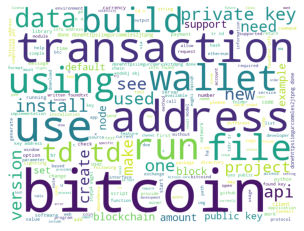

In [36]:
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off');

In [37]:
languages_words_list

['react bitcoin monitor app monitor change _bitcoin price index bpi_ default bpi shown _usd_ _gbp_ _eur_ optionally one select one currency display addition 3 aforementioned currency _bitcoin monitor_ make use _coindesk bitcoin price index api_ go herehttpswwwcoindeskcomprice price information coindesk go herehttpreactbitcoinmonitordrminnaarme live demo application composed following component header heading display application title bitcoinmonitor primary root component manages state underlying component also responsible connecting _bitcoinservice_ retrieve _bitcoin price index_ data display display _bitcoin price index_ data usd gbp eur default also allows one select currency fourth price monitor indicator used _display_ component display indicator show current price previous price component diagram component diagramhttpsuserimagesgithubusercontentcom33935506344607392e3b6a84ee2011e78808a654fbdaaf55png following service used obtain _bitcoin price index_ data bitcoinservice wrapper res

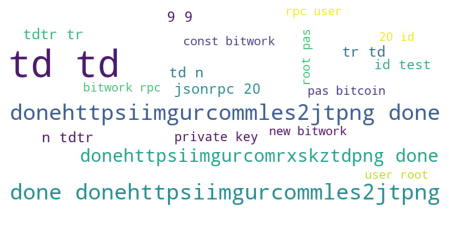

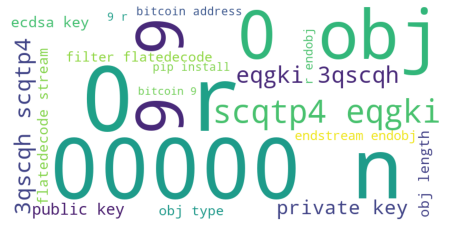

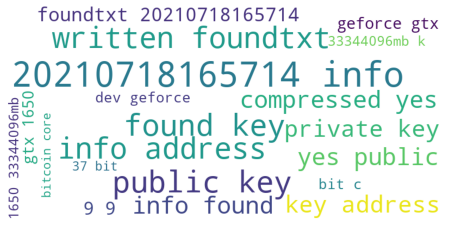

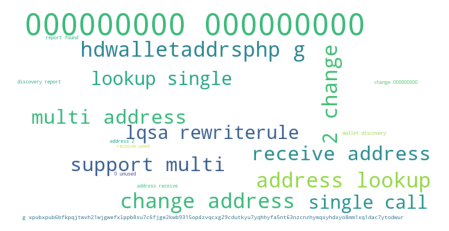

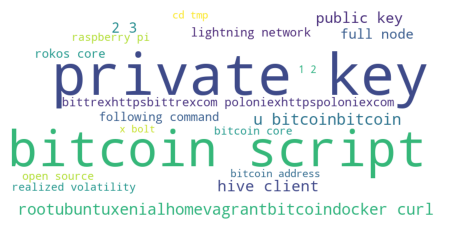

In [38]:
# MY BIGRAMS FOR LOOP BREAKS WITH JEANNETTES CODE TO LUMP LANGUAGES AS 'OTHER'


for language in languages_words_list:
    bigrams = pd.Series(nltk.bigrams(language.split())).value_counts().head(20)


    data = {k[0] + ' ' + k[1]: v for k, v in bigrams.to_dict().items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [39]:
# # value_counts bc we want the most commonly occuring bigrams at the forefront
# java_bigrams = pd.Series(nltk.bigrams(java_words.split())).value_counts().head(20)


# data = {k[0] + ' ' + k[1]: v for k, v in java_bigrams.to_dict().items()}
# img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
# plt.figure(figsize=(8, 4))
# plt.imshow(img)
# plt.axis('off')
# plt.show()

In [40]:
# # value_counts bc we want the most commonly occuring bigrams at the forefront
# java_trigrams = pd.Series(nltk.trigrams(java_words.split())).value_counts().head(20)


# data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in java_trigrams.to_dict().items()}
# img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
# plt.figure(figsize=(8, 4))
# plt.imshow(img)
# plt.axis('off')
# plt.show()

- I'm not a huge fan of the trigrams viz, maybe the bigrams loop.  
- Also, there are no words in the wiki words set

<Figure size 1440x648 with 0 Axes>

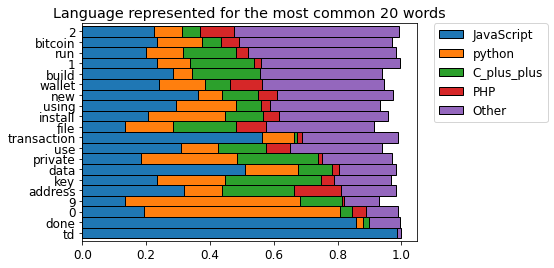

In [41]:
plt.figure(figsize=(20, 9))
plt.rc('font', size=12)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'Other')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('Language represented for the most common 20 words')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [42]:
df.language.value_counts()

Other         55
JavaScript    36
Python        32
C++           15
PHP           14
C              8
Name: language, dtype: int64

In [43]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

<Figure size 1440x720 with 0 Axes>

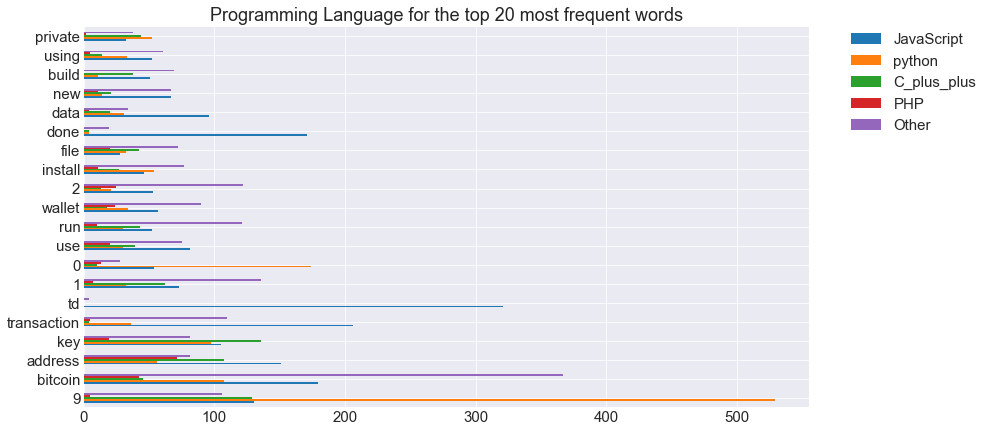

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rc('font', size=15)
word_counts.sort_values('all', ascending=False).head(20)[['JavaScript',
'python',
'C_plus_plus',
'PHP',
'Other'
]].plot.barh()
plt.title('Programming Language for the top 20 most frequent words')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

- At the least, we can see that different languages are more present for different words

In [45]:
freq_list=[
JavaScript_freq,
python_freq,
C_plus_plus_freq,
PHP_freq,
Other_freq
# C_freq,
# Go_freq,
# HTML_freq,
# Java_freq,
# Ruby_freq,
# C_sharp_freq,
# TypeScript_freq,
# Shell_freq,
# Jupyter_Notebook_freq
]

In [46]:

# ALSO BREAKS

# this code is not exactly what i'm shooting for but for time i'm moving on now
for freq in freq_list:
    print(f"{freq}'s most commonly appearing word is {freq.idxmax()}")
    print('----------------------------------------------------')


td                                             321
transaction                                    206
bitcoin                                        179
done                                           171
address                                        151
                                              ... 
lowunderfalse                                    1
gitgithubcomdrminnaarreactbitcoinmonitorgit      1
webcoinparamsiu                                  1
fiat                                             1
workshop                                         1
Length: 4232, dtype: int64's most commonly appearing word is td
----------------------------------------------------
9              529
0              174
bitcoin        107
r              106
key             97
              ... 
_savetofile      1
compromised      1
wpp2t9d          1
websockets       1
correct          1
Length: 5601, dtype: int64's most commonly appearing word is 9
--------------------------------------------------

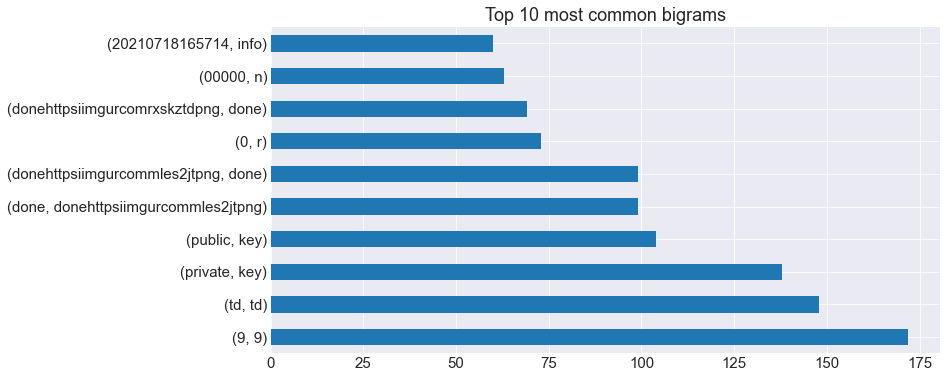

In [47]:
# most common bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common bigrams');

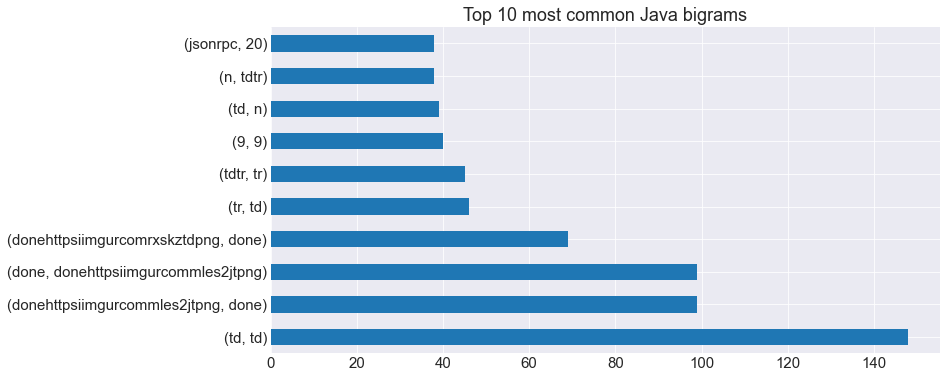

In [48]:
# most common Java bigrams

plt.figure(figsize=(12, 6))
pd.Series(nltk.bigrams(JavaScript_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Java bigrams');

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [50]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized)
y = df.language

X_train, X_validate, y_train, y_validate = train_test_split(X, y, stratify=y, \
                                                            test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,stratify=y_train, test_size=.2)

- a little confusing the way the lesson named the variables

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

lm = LogisticRegression().fit(X_train, y_train)

train['lr_predicted'] = lm.predict(X_train)
validate['lr_predicted'] = lm.predict(X_validate)

In [53]:
# tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
# train['tree_predicted'] = tree.predict(X_train)
# validate['tree_predicted'] = tree.predict(X_validate)

In [54]:
train.head()

,actual,lr_predicted
47,Other,Other
158,PHP,Other
148,Other,Other
128,Other,Other
24,C++,Other


In [55]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.lr_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.lr_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.lr_predicted))

Accuracy: 74.51%
---
Confusion Matrix
actual        C  C++  JavaScript  Other  PHP  Python
lr_predicted                                        
JavaScript    0    0          21      0    0       0
Other         5    8           2     35    9       1
Python        0    1           0      0    0      20
---
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         5
         C++       0.00      0.00      0.00         9
  JavaScript       1.00      0.91      0.95        23
       Other       0.58      1.00      0.74        35
         PHP       0.00      0.00      0.00         9
      Python       0.95      0.95      0.95        21

    accuracy                           0.75       102
   macro avg       0.42      0.48      0.44       102
weighted avg       0.62      0.75      0.66       102



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.lr_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.lr_predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.lr_predicted))

Accuracy: 34.38%
---
Confusion Matrix
actual        C  C++  JavaScript  Other  PHP  Python
lr_predicted                                        
Other         2    3           7     11    3       6
---
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         2
         C++       0.00      0.00      0.00         3
  JavaScript       0.00      0.00      0.00         7
       Other       0.34      1.00      0.51        11
         PHP       0.00      0.00      0.00         3
      Python       0.00      0.00      0.00         6

    accuracy                           0.34        32
   macro avg       0.06      0.17      0.09        32
weighted avg       0.12      0.34      0.18        32



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [58]:
clf = DecisionTreeClassifier(max_depth=8, random_state=123)
clf = clf.fit(X_train, y_train)

train['dt_predicted'] = clf.predict(X_train)
validate['dt_predicted'] = clf.predict(X_validate)

In [59]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['Other', 'PHP', 'Other', 'Other', 'C++'], dtype=object)

In [60]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.        , 0.04878049, 0.09756098, 0.7804878 , 0.02439024,
        0.04878049],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.04878049, 0.09756098, 0.7804878 , 0.02439024,
        0.04878049],
       [0.        , 0.04878049, 0.09756098, 0.7804878 , 0.02439024,
        0.04878049],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [61]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           C       0.62      1.00      0.77         5
         C++       1.00      0.67      0.80         9
  JavaScript       1.00      0.83      0.90        23
       Other       0.79      0.97      0.87        35
         PHP       0.88      0.78      0.82         9
      Python       1.00      0.86      0.92        21

    accuracy                           0.87       102
   macro avg       0.88      0.85      0.85       102
weighted avg       0.90      0.87      0.87       102



In [62]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00         2
         C++       0.00      0.00      0.00         3
  JavaScript       0.22      0.29      0.25         7
       Other       0.29      0.36      0.32        11
         PHP       0.00      0.00      0.00         3
      Python       0.43      0.50      0.46         6

    accuracy                           0.28        32
   macro avg       0.16      0.19      0.17        32
weighted avg       0.23      0.28      0.25        32



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred[0:5]

array(['JavaScript', 'JavaScript', 'JavaScript', 'JavaScript',
       'JavaScript'], dtype=object)

In [65]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00         5
         C++       0.00      0.00      0.00         9
  JavaScript       0.23      1.00      0.37        23
       Other       0.00      0.00      0.00        35
         PHP       0.00      0.00      0.00         9
      Python       0.00      0.00      0.00        21

    accuracy                           0.23       102
   macro avg       0.04      0.17      0.06       102
weighted avg       0.05      0.23      0.08       102



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
y_pred = knn.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00         2
         C++       0.00      0.00      0.00         3
  JavaScript       0.22      1.00      0.36         7
       Other       0.00      0.00      0.00        11
         PHP       0.00      0.00      0.00         3
      Python       0.00      0.00      0.00         6

    accuracy                           0.22        32
   macro avg       0.04      0.17      0.06        32
weighted avg       0.05      0.22      0.08        32



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
from scipy import stats
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# no time to try to squeeze in these regressors : (

In [68]:
from sklearn.ensemble import RandomForestClassifier


In [69]:
# Make the model
forest1 = RandomForestClassifier(max_depth=10, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True,zero_division=0)
print("Tree of 10 depth")
pd.DataFrame(report)

Tree of 10 depth


,C,C++,JavaScript,Other,PHP,Python,accuracy,macro avg,weighted avg
precision,1.000000,1.000000,1.000000,0.729167,1.000000,1.000000,0.872549,0.954861,0.907067
recall,0.800000,0.777778,0.869565,1.000000,0.666667,0.809524,0.872549,0.820589,0.872549
f1-score,0.888889,0.875000,0.930233,0.843373,0.800000,0.894737,0.872549,0.872039,0.874729
support,5.000000,9.000000,23.000000,35.000000,9.000000,21.000000,0.872549,102.000000,102.000000


In [70]:
# Make the model
forest1 = RandomForestClassifier(max_depth=10, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_validate, y_validate)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_validate)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_validate, y_predictions, output_dict=True,zero_division=0)
print("Tree of 10 depth")
pd.DataFrame(report)

Tree of 10 depth


,C,C++,JavaScript,Other,PHP,Python,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,0.916667,1.000000,1.0,0.96875,0.986111,0.971354
recall,1.0,1.0,1.0,1.000000,0.666667,1.0,0.96875,0.944444,0.968750
f1-score,1.0,1.0,1.0,0.956522,0.800000,1.0,0.96875,0.959420,0.966304
support,2.0,3.0,7.0,11.000000,3.000000,6.0,0.96875,32.000000,32.000000


In [71]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dataframe = pd.DataFrame(metrics)
dataframe["difference"] = dataframe.train_accuracy - dataframe.validate_accuracy
dataframe

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.362745,0.34375,0.018995
1,2,0.431373,0.34375,0.087623
2,3,0.490196,0.34375,0.146446
3,4,0.598039,0.34375,0.254289
4,5,0.647059,0.31250,0.334559
5,6,0.725490,0.28125,0.444240
6,7,0.784314,0.34375,0.440564
7,8,0.843137,0.34375,0.499387
8,9,0.882353,0.34375,0.538603
9,10,0.872549,0.34375,0.528799


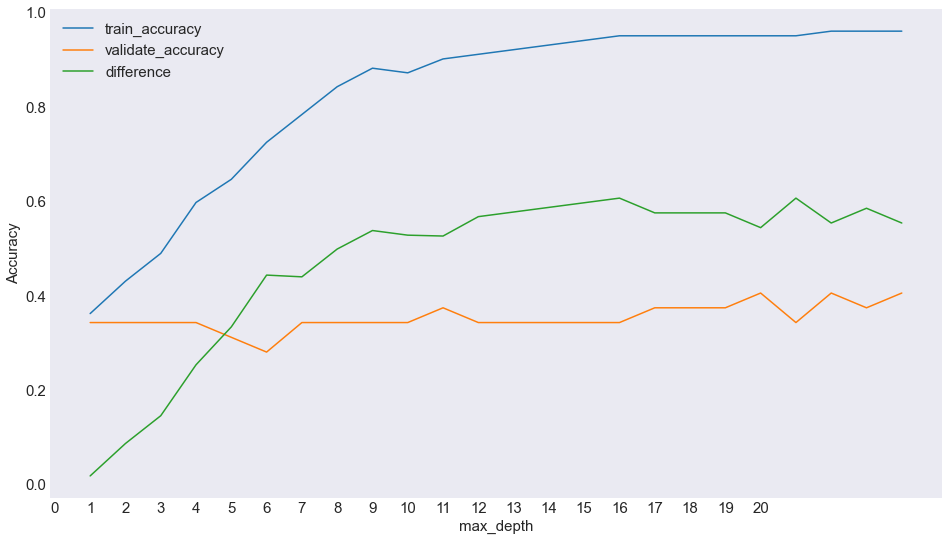

In [73]:
dataframe.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

# ok this is more promising....overfit? seemsok on validate

# The below cells are the same models but built on the bag-of-words method (countvectorizer())

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer()

In [75]:
tfidf = TfidfVectorizer()
X = vectorizer.fit_transform(df.lemmatized)
y = df.language

X_train, X_validate, y_train, y_validate = train_test_split(X, y, stratify=y, \
                                                            test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,stratify=y_train, test_size=.2)

In [76]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))

lm = LogisticRegression().fit(X_train, y_train)

train['lr_predicted_bagofwords'] = lm.predict(X_train)
validate['lr_predicted_bagofwords'] = lm.predict(X_validate)

In [77]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.lr_predicted_bagofwords)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.lr_predicted_bagofwords, train.actual))
print('---')
print(classification_report(train.actual, train.lr_predicted_bagofwords))

Accuracy: 95.10%
---
Confusion Matrix
actual                   C  C++  JavaScript  Other  PHP  Python
lr_predicted_bagofwords                                        
C                        5    0           0      0    0       0
C++                      0    8           0      0    0       0
JavaScript               0    0          21      0    0       0
Other                    0    1           2     35    1       1
PHP                      0    0           0      0    8       0
Python                   0    0           0      0    0      20
---
              precision    recall  f1-score   support

           C       1.00      1.00      1.00         5
         C++       1.00      0.89      0.94         9
  JavaScript       1.00      0.91      0.95        23
       Other       0.88      1.00      0.93        35
         PHP       1.00      0.89      0.94         9
      Python       1.00      0.95      0.98        21

    accuracy                           0.95       102
   macro avg

In [78]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.lr_predicted_bagofwords)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.lr_predicted_bagofwords, validate.actual))
print('---')
print(classification_report(validate.actual, validate.lr_predicted_bagofwords))


Accuracy: 43.75%
---
Confusion Matrix
actual                   C  C++  JavaScript  Other  PHP  Python
lr_predicted_bagofwords                                        
C++                      0    1           0      0    0       0
JavaScript               1    1           1      2    0       0
Other                    1    1           3      6    3       0
Python                   0    0           3      3    0       6
---
              precision    recall  f1-score   support

           C       0.00      0.00      0.00         2
         C++       1.00      0.33      0.50         3
  JavaScript       0.20      0.14      0.17         7
       Other       0.43      0.55      0.48        11
         PHP       0.00      0.00      0.00         3
      Python       0.50      1.00      0.67         6

    accuracy                           0.44        32
   macro avg       0.35      0.34      0.30        32
weighted avg       0.38      0.44      0.37        32



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
clf = DecisionTreeClassifier(max_depth=10, random_state=123)
clf = clf.fit(X_train, y_train)

train['dt_predicted_bagofwords'] = clf.predict(X_train)
validate['dt_predicted_bagofwords'] = clf.predict(X_validate)

In [80]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['Other', 'C++', 'JavaScript', 'JavaScript', 'Other'], dtype=object)

In [81]:
y_pred_proba = clf.predict_proba(X_train)

In [82]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           C       1.00      0.60      0.75         5
         C++       1.00      0.78      0.88         9
  JavaScript       0.95      0.83      0.88        23
       Other       0.66      1.00      0.80        35
         PHP       1.00      0.67      0.80         9
      Python       1.00      0.62      0.76        21

    accuracy                           0.81       102
   macro avg       0.94      0.75      0.81       102
weighted avg       0.87      0.81      0.81       102



In [83]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00         2
         C++       0.00      0.00      0.00         3
  JavaScript       0.60      0.43      0.50         7
       Other       0.37      0.64      0.47        11
         PHP       1.00      0.33      0.50         3
      Python       0.20      0.17      0.18         6

    accuracy                           0.38        32
   macro avg       0.36      0.26      0.27        32
weighted avg       0.39      0.38      0.35        32



In [84]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred[0:5]

array(['Other', 'Other', 'Python', 'JavaScript', 'Other'], dtype=object)

In [85]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           C       1.00      0.20      0.33         5
         C++       1.00      0.33      0.50         9
  JavaScript       0.51      0.78      0.62        23
       Other       0.61      0.86      0.71        35
         PHP       1.00      0.33      0.50         9
      Python       0.64      0.33      0.44        21

    accuracy                           0.61       102
   macro avg       0.79      0.47      0.52       102
weighted avg       0.68      0.61      0.58       102



In [86]:
y_pred = knn.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           C       0.00      0.00      0.00         2
         C++       0.00      0.00      0.00         3
  JavaScript       0.25      0.43      0.32         7
       Other       0.44      0.64      0.52        11
         PHP       0.00      0.00      0.00         3
      Python       0.50      0.33      0.40         6

    accuracy                           0.38        32
   macro avg       0.20      0.23      0.21        32
weighted avg       0.30      0.38      0.32        32



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
# Make the model
forest1 = RandomForestClassifier(max_depth=10, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True,zero_division=0)
print("Tree of 10 depth")
pd.DataFrame(report)

Tree of 10 depth


,C,C++,JavaScript,Other,PHP,Python,accuracy,macro avg,weighted avg
precision,1.00,1.000000,1.000000,0.636364,1.000000,1.000000,0.803922,0.939394,0.875223
recall,0.60,0.777778,0.869565,1.000000,0.555556,0.571429,0.803922,0.729055,0.803922
f1-score,0.75,0.875000,0.930233,0.777778,0.714286,0.727273,0.803922,0.795761,0.803371
support,5.00,9.000000,23.000000,35.000000,9.000000,21.000000,0.803922,102.000000,102.000000


In [91]:


# Make the model
forest1 = RandomForestClassifier(max_depth=10, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_validate)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_validate, y_predictions, output_dict=True,zero_division=0)
print("Tree of 10 depth")
pd.DataFrame(report)

Tree of 10 depth


,C,C++,JavaScript,Other,PHP,Python,accuracy,macro avg,weighted avg
precision,0.0,0.0,1.000000,0.354839,0.0,0.0,0.375,0.225806,0.340726
recall,0.0,0.0,0.142857,1.000000,0.0,0.0,0.375,0.190476,0.375000
f1-score,0.0,0.0,0.250000,0.523810,0.0,0.0,0.375,0.128968,0.234747
support,2.0,3.0,7.000000,11.000000,3.0,6.0,0.375,32.000000,32.000000


# The RF model performs best without terrible overfit on both the bag of words approach and the td-idf

In [89]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dataframe = pd.DataFrame(metrics)
dataframe["difference"] = dataframe.train_accuracy - dataframe.validate_accuracy
dataframe

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.343137,0.34375,-0.000613
1,2,0.392157,0.34375,0.048407
2,3,0.470588,0.34375,0.126838
3,4,0.500000,0.37500,0.125000
4,5,0.578431,0.37500,0.203431
5,6,0.656863,0.37500,0.281863
6,7,0.715686,0.37500,0.340686
7,8,0.754902,0.34375,0.411152
8,9,0.794118,0.37500,0.419118
9,10,0.803922,0.37500,0.428922


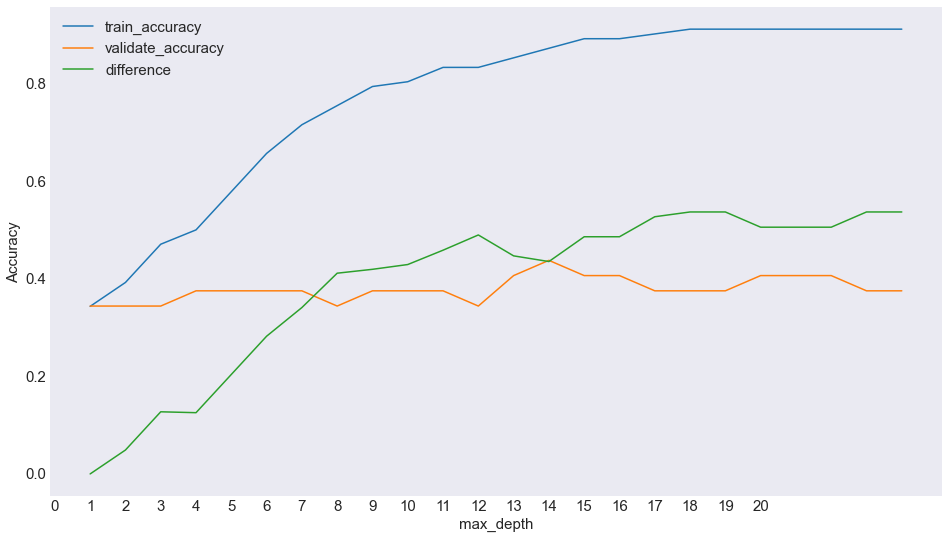

In [90]:
dataframe.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

# Everything here and below is my attempt to draw a network graph with networkx

#### Networkx has to be installed using pip or conda

In [ ]:
import networkx as nx
import plotly.graph_objects as go

In [ ]:
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)
nx.shortest_path(G, 'A', 'D', weight='weight')
['A', 'B', 'D']

In [ ]:
# Build a dataframe with 4 connections
sample = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# Build your graph
G=nx.from_pandas_edgelist(sample, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
G = nx.random_geometric_graph(200, 0.125,seed=None)

In [ ]:
# G.edges
G.nodes

In [ ]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [ ]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [ ]:
G=nx.Graph()

In [ ]:
# java_words = basic_clean(' '.join(df[df.language == 'Java'].readme_contents))
# c_plus_plus__words = basic_clean(' '.join(df[df.language == 'C++'].readme_contents))
# wiki_words = basic_clean(' '.join(train[train.language == 'Wikitext'].readme_contents))
# type_words = basic_clean(' '.join(df[df.language == 'TypeScript'].readme_contents))
# c_words = basic_clean(' '.join(df[df.language == 'C'].readme_contents))
# ascii_words = basic_clean(' '.join(df[df.language == 'AsciiDoc'].readme_contents))
# python_words = basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
# html_words = basic_clean(' '.join(df[df.language == 'HTML'].readme_contents))

In [ ]:
G.add_edge(java_words)
G.add_edge(c_plus_plus__words)
G.add_edge(wiki_words)
G.add_edge(type_words)
G.add_edge(c_words)
G.add_edge(ascii_words)
G.add_edge(python_words)
G.add_edge(html_words)

In [ ]:
G.nodes

In [ ]:
G.add_edges_from(all_words)